<a href="https://colab.research.google.com/github/Akshatpattiwar512/GreyCampus-DataScience-Foundation/blob/main/Petroleum_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("petrol_consumption.csv")
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [7]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
df.shape

(48, 5)

In [5]:
df.head

<bound method NDFrame.head of     Petrol_tax  ...  Petrol_Consumption
0         9.00  ...                 541
1         9.00  ...                 524
2         9.00  ...                 561
3         7.50  ...                 414
4         8.00  ...                 410
5        10.00  ...                 457
6         8.00  ...                 344
7         8.00  ...                 467
8         8.00  ...                 464
9         7.00  ...                 498
10        8.00  ...                 580
11        7.50  ...                 471
12        7.00  ...                 525
13        7.00  ...                 508
14        7.00  ...                 566
15        7.00  ...                 635
16        7.00  ...                 603
17        7.00  ...                 714
18        7.00  ...                 865
19        8.50  ...                 640
20        7.00  ...                 649
21        8.00  ...                 540
22        9.00  ...                 464
23        

In [11]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

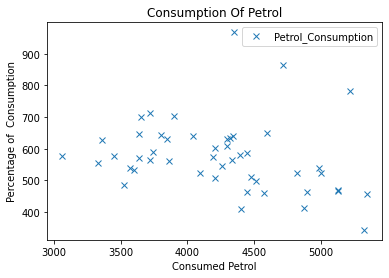

In [8]:
df.plot(x='Average_income', y='Petrol_Consumption', style='x')
plt.title('Consumption Of Petrol')
plt.xlabel('Consumed Petrol')
plt.ylabel('Percentage of  Consumption')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '9.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '7.5'),
 Text(0, 0, '8.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '8.0')]

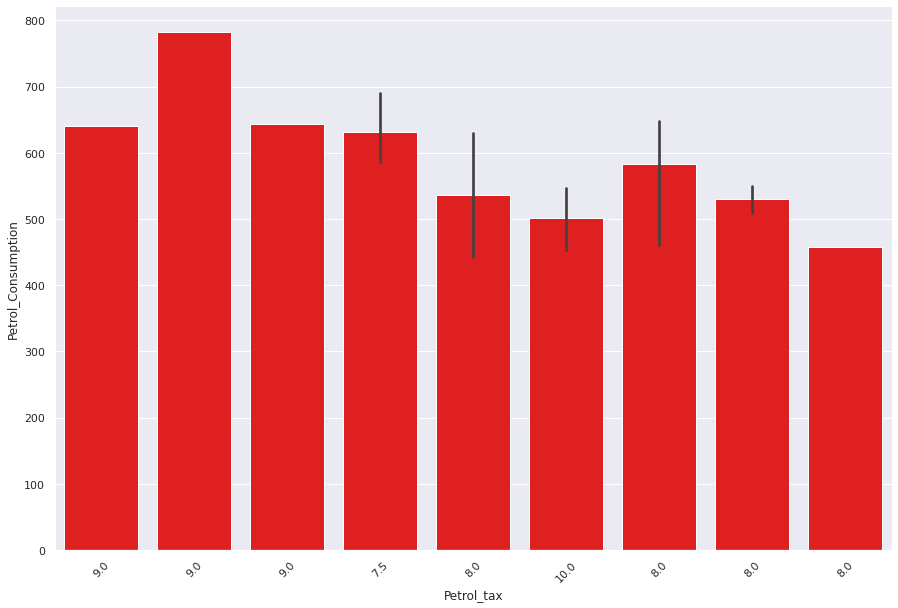

In [19]:
bar = sns.barplot(df['Petrol_tax'], df['Petrol_Consumption'], color = "red")
bar.set_xticklabels(df['Petrol_tax'], rotation=45)

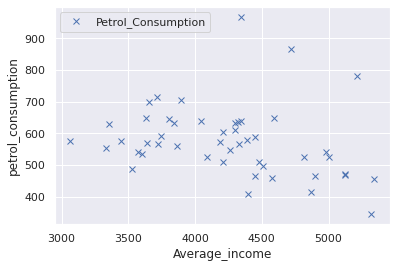

In [24]:
df.plot(x='Average_income', y='Petrol_Consumption', style='x')
plt.xlabel('Average_income')
plt.ylabel('petrol_consumption')
plt.show()

In [27]:
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [32]:
y_pred = regressor.predict(X_test)

In [35]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168
